In [1]:
# This code is simply about some EDA about the virat and how he lost his wicket
# So lets start to do it...

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data= pd.read_csv(r'../input/virat-wickets/final_report.csv')
data.head(10)

,How_out,wicket,Fielder,Bowler,Runs,Inns,Opposition,Ground,Start_Date,pace
0,lbw,1,NaN,KMDN Kulasekara,12,1,v Sri Lanka,Dambulla,18-08-2008,right-arm pace
1,caught,1,CK Kapugedera,T Thushara,37,2,v Sri Lanka,Dambulla,20-08-2008,left-arm pace
2,run out,1,NaN,NaN,25,1,v Sri Lanka,Colombo (RPS),24-08-2008,0
3,bowled,1,NaN,T Thushara,54,1,v Sri Lanka,Colombo (RPS),27-08-2008,left-arm pace
4,lbw,1,NaN,KMDN Kulasekara,31,2,v Sri Lanka,Colombo (RPS),29-08-2008,right-arm pace
5,not out,0,NaN,NaN,2,1,v Sri Lanka,Colombo (RPS),14-09-2009,0
6,caught,1,Umar Gul,Shahid Afridi,16,2,v Pakistan,Centurion,26-09-2009,right-arm spin
7,TDNB,0,NaN,NaN,-,0,v Australia,Centurion,28-09-2009,0
8,not out,0,NaN,NaN,79,2,v West Indies,Johannesburg,30-09-2009,0
9,caught,1,SR Watson,AC Voges,30,2,v Australia,Vadodara,25-10-2009,left-arm spin


In [4]:
data['wicket'].value_counts()

1    206
0     48
Name: wicket, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   How_out     254 non-null    object
 1   wicket      254 non-null    int64 
 2   Fielder     151 non-null    object
 3   Bowler      194 non-null    object
 4   Runs        254 non-null    object
 5   Inns        254 non-null    int64 
 6   Opposition  254 non-null    object
 7   Ground      254 non-null    object
 8   Start_Date  254 non-null    object
 9   pace        254 non-null    object
dtypes: int64(2), object(8)
memory usage: 20.0+ KB


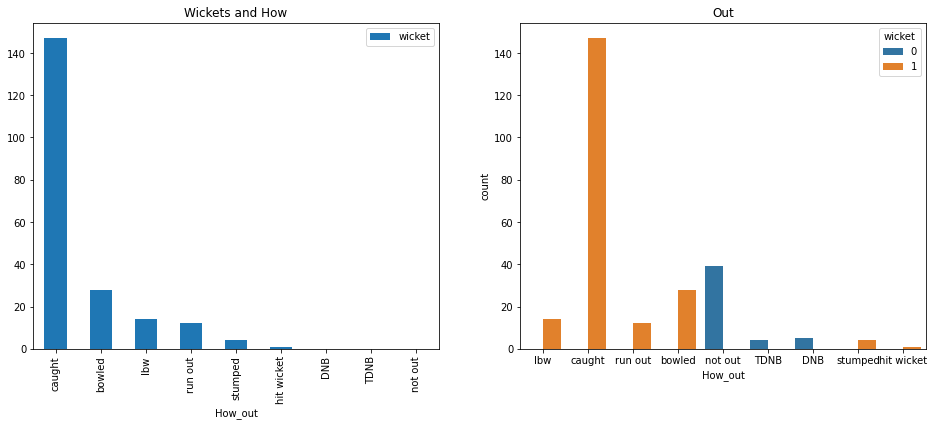

In [6]:
f,ax = plt.subplots(1,2,figsize=(16,6))
data[['How_out','wicket']].groupby('How_out').sum().sort_values('wicket',ascending=False).plot.bar(ax=ax[0])
ax[0].set_title('Wickets and How')
sns.countplot('How_out',hue='wicket',data= data,ax=ax[1])
ax[1].set_title('Out')
plt.show()

In [7]:
# Virat has been lost is wicket most of the times by getting caught. Let see with which team he has lost his wicket mostly

In [8]:
pd.crosstab(data.Opposition,data.wicket).T.style.background_gradient()

Opposition,v Afghanistan,v Australia,v Bangladesh,v England,v Ireland,v Netherlands,v New Zealand,v Pakistan,v South Africa,v Sri Lanka,v U.A.E.,v West Indies,v Zimbabwe
wicket,,,,,,,,,,,,,
0,1,5,3,4,1,0,3,2,7,10,1,8,3
1,1,38,9,29,1,1,23,11,20,37,0,31,5


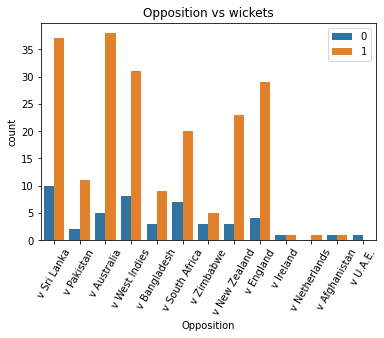

In [9]:
sns.countplot('Opposition',hue='wicket',data=data)
plt.xticks(rotation=60)
plt.title('Opposition vs wickets')
plt.legend(loc='upper right')
plt.show()

In [10]:
# We can see that he has lost the wicket most of the time when we played against Australia and with srilanka 
# But when compared to Australia the percent he got out is lesser

In [11]:
# let create a function to do some Analysis in the features
def columndist(df, maxgraph, graphperrow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col]>1 and nunique[col]<70]]
    nrow, ncol = df.shape
    colname = list(df)
    graphrow = (ncol+graphperrow-1/graphperrow)
    plt.figure(figsize=(12*graphperrow,8*graphrow), dpi = 80)
    for i in range(min(ncol,maxgraph)):
        plt.subplot(graphrow,graphperrow,i+1)
        colndf = df.iloc[:,i]
        if (not np.issubdtype(type(colndf.iloc[0]),np.number)):
            value_count = colndf.value_counts()
            value_count.plot.bar()
        else:
            colndf.hist()
        plt.title(f'{colname[i]}')
        plt.xticks(rotation=90)
    plt.show()
    

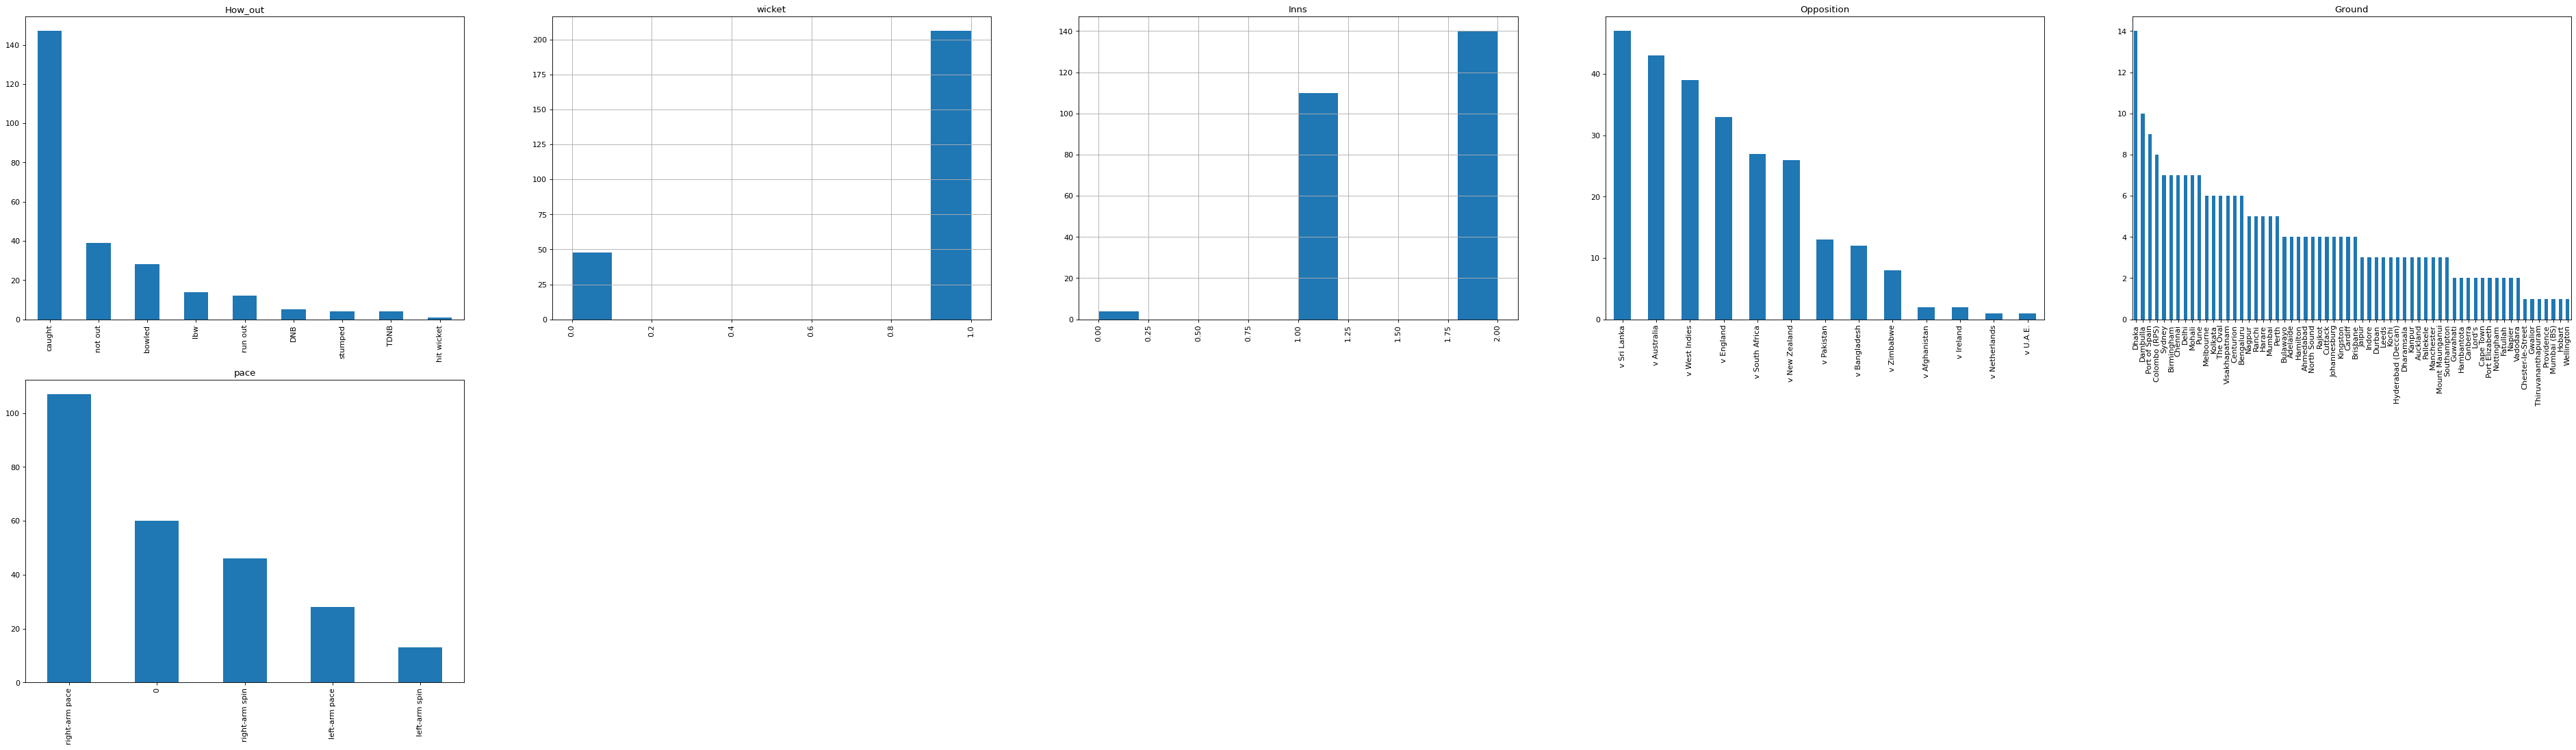

In [12]:
columndist(data,10,5)

In [13]:
data.describe(include='all')

,How_out,wicket,Fielder,Bowler,Runs,Inns,Opposition,Ground,Start_Date,pace
count,254,254.000000,151,194,254,254.000000,254,254,254,254
unique,9,NaN,108,102,116,NaN,13,62,254,5
top,caught,NaN,KC Sangakkara,R Rampaul,0,NaN,v Sri Lanka,Dhaka,20-10-2011,right-arm pace
freq,147,NaN,7,6,13,NaN,47,14,1,107
mean,NaN,0.811024,NaN,NaN,NaN,1.535433,NaN,NaN,NaN,NaN
std,NaN,0.392263,NaN,NaN,NaN,0.530423,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,1.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN


In [14]:
data[data['How_out'].isin(['TDNB' , 'DNB' , 'run out'])]

,How_out,wicket,Fielder,Bowler,Runs,Inns,Opposition,Ground,Start_Date,pace
2,run out,1,NaN,NaN,25,1,v Sri Lanka,Colombo (RPS),24-08-2008,0
7,TDNB,0,NaN,NaN,-,0,v Australia,Centurion,28-09-2009,0
14,TDNB,0,NaN,NaN,-,0,v Sri Lanka,Delhi,27-12-2009,0
21,DNB,0,NaN,NaN,-,1,v South Africa,Gwalior,24-02-2010,0
23,run out,1,NaN,NaN,0,1,v Zimbabwe,Bulawayo,28-05-2010,0
41,run out,1,NaN,NaN,22,1,v South Africa,Johannesburg,15-01-2011,0
47,run out,1,NaN,NaN,34,2,v Ireland,Bengaluru,06-03-2011,0
58,run out,1,NaN,NaN,94,1,v West Indies,Kingston,16-06-2011,0
75,run out,1,NaN,NaN,77,2,v Sri Lanka,Perth,08-02-2012,0
111,DNB,0,NaN,NaN,-,2,v Zimbabwe,Bulawayo,01-08-2013,0


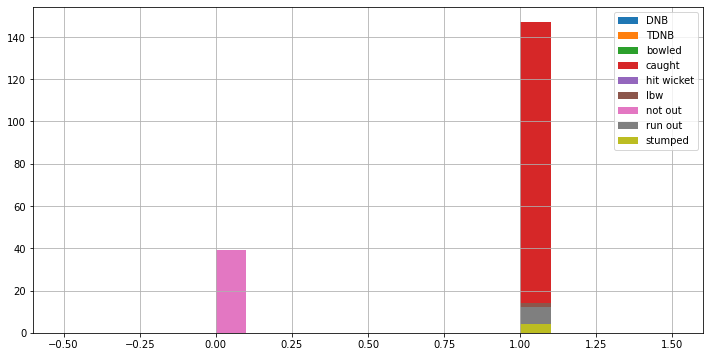

In [15]:
plt.figure(figsize=(12,6))
dis=data.groupby('How_out')['wicket'].hist(legend=True)
plt.show()

<AxesSubplot:xlabel='None,How_out'>

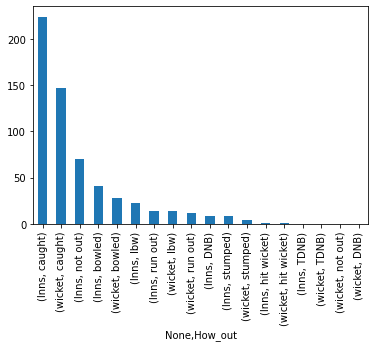

In [16]:
data.groupby('How_out').sum().unstack().sort_values(ascending=False).plot(kind='bar',stacked=False)

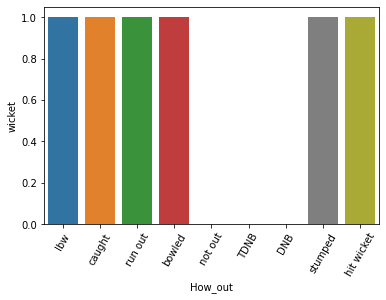

In [17]:
sns.barplot(data['How_out'],data['wicket'])
plt.xticks(rotation=60)
plt.show()

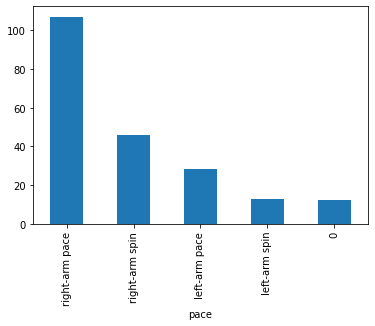

In [18]:
data[data['wicket']==1].groupby(data['pace']).size().sort_values(ascending=False).plot.bar()
plt.show()

In [19]:
# Virat lost his wickets mostly when he faced Right_arm pace and also he has played mostly againt the same pacers only
# So it might be also reason he lost his wicket against that pace